# Credit Card Fraud Prediction

## Introduction
In this classification project, the goal is to detect credit card fraud using the dataset found in [Kaggle](https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction). The project involves various stages, including data exploration, preprocessing, feature engineering, hypothesis testing, and model training.

## Project Scheme
1. **Data Exploration**:
   - Initially, the dataset was thoroughly studied, examining each available feature and its format to gain insights into the data structure.
  
2. **Feature Selection**:
   - Some features that were deemed irrelevant or not useful for the analysis were removed from the dataset.
  
3. **Feature Engineering**:
   - Age categories were created based on the age of individuals in the dataset, and they were subsequently encoded for further analysis.
   - Features such as category, gender, and state were also encoded to prepare them for modeling.
  
4. **Income Category**:
   - A new feature representing income category was created by assigning income categories to job titles using Google Gemini.
   - An observation was made that card fraud was more prevalent among individuals in the middle-income category, prompting further investigation.

5. **Hypothesis Testing**:
   - A hypothesis test was conducted to determine the significance of the observed difference in card fraud rates among different income categories.

6. **Incorporation of Additional Data**:
   - Total crime statistics from each state in 2008 were obtained from a supplementary dataset on [Kaggle](https://www.kaggle.com/datasets/kabhishm/united-states-crime-rates-by-city-population/data).
   - This data was preprocessed and merged with the existing card fraud dataset to provide additional insights.

7. **Data Cleaning**:
   - Entries from states not included in the crime dataset were removed to ensure data consistency and integrity.

8. **Model Training**:
   - A custom class was developed to facilitate model training, prediction, and evaluation.
   - The class provides functionality to calculate accuracy scores and generate confusion matrices for each model.

9. **Model Implementation**:
   - The custom class was instantiated for each classification model to be trained, including Logistic Regression, Naive Bayes, LDA, K-Nearest Neighbors, and more.

10. **Evaluation**:
    - Finally, the performance of each model was evaluated, and the confusion matrix from the model with the highest accuracy score was plotted for further analysis.


In [33]:
import numpy as np
import pandas as pd

# Computation of z-score
from scipy import stats

# Utility for training and evaluating
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

# Predicting Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt


## Preprocessing

In [2]:
card = pd.read_csv("D:\\Downloads\\fraudtest.csv", index_col=0)
card.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
card.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

I will only keep the rows that I believe will be useful for predicting instances of fraudulent actions. Feature 'cc_num' is described as unique customer identification. I can safely assume the id will not have any relation to fraudulent actions. I will also remove first and last name, as one can think of name as something entirely random. I will also remove 'Trans_num', that is the transaction identifier. I will also drop some columns I don't intend to use. I will delete the columns related to location coordinates and the merchant column.

In [4]:
drop_cols = ['cc_num', 'first', 'last', 'trans_num', 'merchant', 'street', 'zip', 'trans_date_trans_time', 'merch_lat', 'merch_long']
card = card.drop(columns=drop_cols)
card.head()

,category,amt,gender,city,state,lat,long,city_pop,job,dob,unix_time,is_fraud
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,1371816865,0
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,1371816873,0
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,1371816893,0
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,25/07/1987,1371816915,0
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,06/07/1955,1371816917,0


In [5]:
card.columns

Index(['category', 'amt', 'gender', 'city', 'state', 'lat', 'long', 'city_pop',
       'job', 'dob', 'unix_time', 'is_fraud'],
      dtype='object')

I intend to use the state, gender and category for prediction. I need to do one-hot-encoding of these features for classification

### Converting time features into 'datetime' data type

In [6]:
card["dob"] = pd.to_datetime(card["dob"], format = '%d/%m/%Y')

### Renaming Columns

In [7]:
new_names = {'amt':'transactionAmount', 'city_pop': 'cityPopulation', 'dob':'dateBirth', 'is_fraud': 'isFraud01'}

card.rename(columns=new_names, inplace=True)
card.head()

,category,transactionAmount,gender,city,state,lat,long,cityPopulation,job,dateBirth,unix_time,isFraud01
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,0
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,0
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,0
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,0
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,0


### Creating Age Categories

In [8]:
card['birthYear'] = card['dateBirth'].dt.year
card['age'] =  2024 - card['birthYear'] 

# Establishing the bins width
num_bins = 9
bin_width = (card['age'].max() - card['age'].min()) / num_bins

# Creating a list of numbers for the lowest and upper limits of the bins
bins = [card['age'].min() + i * bin_width for i in range(num_bins + 1)]
bins = [int(x) for x in bins]

# Creating the 'ageGroup' field from the defined bins
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(num_bins)]
card['ageGroup'] = pd.cut(card['age'], bins = bins, labels = labels, include_lowest=True)
card.head()


,category,transactionAmount,gender,city,state,lat,long,cityPopulation,job,dateBirth,unix_time,isFraud01,birthYear,age,ageGroup
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,0,1968,56,55-64
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,0,1990,34,28-37
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,0,1970,54,46-55
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,0,1987,37,28-37
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,0,1955,69,64-73


In [9]:
card.drop(columns=['birthYear', 'age'], inplace=True)

### One-Hot Encoding

In [10]:
one_hot_state = pd.get_dummies(card['state'], prefix='is_state').astype(int)
one_hot_gender = pd.get_dummies(card['gender'], prefix='is_gender').astype(int)
one_hot_category = pd.get_dummies(card['category'], prefix='is_category').astype(int)
one_hot_ageGroup = pd.get_dummies(card['ageGroup'], prefix='is_age').astype(int)

In [11]:
pd.set_option('display.max_columns', None)

card_encoded = pd.concat([card, one_hot_state, one_hot_gender, one_hot_category, one_hot_ageGroup], axis = 1)
card_encoded.head()

,category,transactionAmount,gender,city,state,lat,long,cityPopulation,job,dateBirth,unix_time,isFraud01,ageGroup,is_state_AK,is_state_AL,is_state_AR,is_state_AZ,is_state_CA,is_state_CO,is_state_CT,is_state_DC,is_state_FL,is_state_GA,is_state_HI,is_state_IA,is_state_ID,is_state_IL,is_state_IN,is_state_KS,is_state_KY,is_state_LA,is_state_MA,is_state_MD,is_state_ME,is_state_MI,is_state_MN,is_state_MO,is_state_MS,is_state_MT,is_state_NC,is_state_ND,is_state_NE,is_state_NH,is_state_NJ,is_state_NM,is_state_NV,is_state_NY,is_state_OH,is_state_OK,is_state_OR,is_state_PA,is_state_RI,is_state_SC,is_state_SD,is_state_TN,is_state_TX,is_state_UT,is_state_VA,is_state_VT,is_state_WA,is_state_WI,is_state_WV,is_state_WY,is_gender_F,is_gender_M,is_category_entertainment,is_category_food_dining,is_category_gas_transport,is_category_grocery_net,is_category_grocery_pos,is_category_health_fitness,is_category_home,is_category_kids_pets,is_category_misc_net,is_category_misc_pos,is_category_personal_care,is_category_shopping_net,is_category_shopping_pos,is_category_travel,is_age_19-28,is_age_28-37,is_age_37-46,is_age_46-55,is_age_55-64,is_age_64-73,is_age_73-82,is_age_82-91,is_age_91-100
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,0,55-64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,0,28-37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,0,46-55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,0,28-37,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,0,64-73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


## New Feature: income category

It is pretty clear that the job of the individual will be a predictor for credit card fraud. The relationship is in the salary. However, the data I have at hand is not very useful since a single string with a job title that may even be ambiguous such as 'computer', will not be of much use. I will use gemini to relate each of the jobs to a salary category: 'High', 'Medium' and 'Low', representing the income related to that job. This however, has flaws in the fact that Gemini may provide with false information ever so often and may struggle to understand some of these job titles (as they can be quite ambiguous). 

In [12]:
job_earnings_dict = {
    'Academic librarian': 'Medium',
    'Accountant, chartered certified': 'High',
    'Accountant, chartered public finance': 'High',
    'Accounting technician': 'Medium',
    'Acupuncturist': 'Medium',
    'Administrator': 'Medium',
    'Administrator, arts': 'Medium',
    'Administrator, charities/voluntary organisations': 'Medium',
    'Administrator, education': 'Medium',
    'Administrator, local government': 'Medium',
    'Advertising account executive': 'Medium',
    'Advertising account planner': 'Medium',
    'Advertising copywriter': 'Medium',
    'Advice worker': 'Medium',
    'Aeronautical engineer': 'High',
    'Agricultural consultant': 'Medium',
    'Aid worker': 'Medium',
    'Air broker': 'High',
    'Air cabin crew': 'Medium',
    'Airline pilot': 'High',
    'Ambulance person': 'Medium',
    'Amenity horticulturist': 'Medium',
    'Analytical chemist': 'High',
    'Animal nutritionist': 'Medium',
    'Animal technologist': 'Medium',
    'Animator': 'Medium',
    'Applications developer': 'High',
    'Arboriculturist': 'Medium',
    'Archaeologist': 'Medium',
    'Architect': 'High',
    'Architectural technologist': 'Medium',
    'Archivist': 'Medium',
    'Armed forces logistics/support/administrative officer': 'Medium',
    'Armed forces training and education officer': 'Medium',
    'Art gallery manager': 'Medium',
    'Art therapist': 'Medium',
    'Artist': 'Medium',
    'Arts development officer': 'Medium',
    'Associate Professor': 'High',
    'Audiological scientist': 'High',
    'Barista': 'Low',
    'Barrister': 'High',
    "Barrister's clerk": 'Medium',
    'Biochemist, clinical': 'High',
    'Biomedical engineer': 'High',
    'Biomedical scientist': 'High',
    'Bookseller': 'Medium',
    'Broadcast engineer': 'High',
    'Broadcast presenter': 'High',
    'Building control surveyor': 'Medium',
    'Building services engineer': 'High',
    'Building surveyor': 'High',
    'Buyer, industrial': 'Medium',
    'Buyer, retail': 'Medium',
    'Cabin crew': 'Medium',
    'Call centre manager': 'Medium',
    'Camera operator': 'Medium',
    'Careers information officer': 'Medium',
    'Cartographer': 'Medium',
    'Catering manager': 'Medium',
    'Ceramics designer': 'Medium',
    'Charity fundraiser': 'Medium',
    'Charity officer': 'Medium',
    'Chartered accountant': 'High',
    'Chartered legal executive (England and Wales)': 'High',
    'Chartered loss adjuster': 'High',
    'Chartered public finance accountant': 'High',
    'Chemical engineer': 'High',
    'Chemist, analytical': 'High',
    'Chief Executive Officer': 'High',
    'Chief Financial Officer': 'High',
    'Chief Marketing Officer': 'High',
    'Chief Operating Officer': 'High',
    'Chief Strategy Officer': 'High',
    'Chief Technology Officer': 'High',
    'Chief of Staff': 'High',
    'Child psychotherapist': 'High',
    'Chiropodist': 'Medium', 
    'Civil Service administrator': 'Medium',
    'Civil Service fast streamer': 'Medium',
    'Civil engineer, contracting': 'High',
    'Claims inspector/assessor': 'Medium',
    'Clinical biochemist': 'High',
    'Clinical cytogeneticist': 'High',
    'Clinical psychologist': 'High',
    'Clinical research associate': 'Medium',
    'Clothing/textile technologist': 'Medium',
    'Colour technologist': 'Medium',
    'Commercial horticulturist': 'Medium',
    'Commercial/residential surveyor': 'Medium',
    'Commissioning editor': 'Medium',
    'Communications engineer': 'High',
    'Community arts worker': 'Medium',
    'Community development worker': 'Medium',
    'Community education officer': 'Medium',
    'Community pharmacist': 'High',
    'Company secretary': 'Medium',
    'Comptroller': 'High',
    'Conservation officer, historic buildings': 'Medium',
    'Conservator, furniture': 'Medium',
    'Conservator, museum/gallery': 'Medium',
    'Contractor': 'High',
    'Control and instrumentation engineer': 'High',
    'Copy': 'NA',
    'Copywriter, advertising': 'Medium',
    'Corporate investment banker': 'High',
    'Counselling psychologist': 'High',
    'Counsellor': 'Medium',
    'Curator': 'Medium',
    'Cytogeneticist': 'High',
    'Dance movement psychotherapist': 'High',
    'Data scientist': 'High',
    'Database administrator': 'Medium',
    'Dealer': 'NA',
    'Designer, ceramics/pottery': 'Medium',
    'Designer, exhibition/display': 'Medium',
    'Designer, furniture': 'Medium',
    'Designer, industrial/product': 'Medium',
    'Designer, interior/spatial': 'Medium',
    'Designer, jewellery': 'NA',
    'Designer, multimedia': 'Medium',
    'Designer, television/film set': 'Medium',
    'Designer, textile': 'Medium',
    'Development worker, community': 'Medium',
    'Development worker, international aid': 'Medium',
    'Diagnostic radiographer': 'High',
    'Dispensing optician': 'High',
    'Doctor, general practice': 'High',
    'Doctor, hospital': 'High',
    'Drilling engineer': 'High',
    'Early years teacher': 'Medium',
    'Ecologist': 'Medium',
    'Economist': 'High',
    'Editor, commissioning': 'Medium',
    'Editor, film/video': 'Medium',
    'Editor, magazine features': 'Medium',
    'Education administrator': 'Medium',
    'Education officer, community': 'Medium',
    'Education officer, museum': 'Medium',
    'Educational psychologist': 'High',
    'Electrical engineer': 'High',
    'Electronics engineer': 'High',
    'Embryologist, clinical': 'High',
    'Emergency planning/management officer': 'Medium',
    'Energy engineer': 'High',
    'Energy manager': 'Medium',
    'Engineer, aeronautical': 'High',
    'Engineer, agricultural': 'Medium',
    'Engineer, automotive': 'High',
    'Engineer, biomedical': 'High',
    'Engineer, broadcasting (operations)': 'High',
    'Engineer, building services': 'High',
    'Engineer, civil (consulting)': 'High',
    'Engineer, civil (contracting)': 'High',
    'Engineer, communications': 'High',
    'Engineer, control and instrumentation': 'High',
    'Engineer, drilling': 'High',
    'Engineer, electronics': 'High',
    'Engineer, land': 'Medium',
    'Engineer, maintenance': 'Medium',
    'Engineer, manufacturing': 'High',
    'Engineer, materials': 'High',
    'Engineer, mining': 'High',
    'Engineer, petroleum': 'High',
    'Engineer, production': 'High',
    'Engineer, structural': 'High',
    'Engineer, technical sales': 'Medium',
    'Engineer, water': 'High',
    'Engineering geologist': 'High',
    'English as a foreign language teacher': 'Medium',
    'English as a second language teacher': 'Medium',
    'Environmental consultant': 'Medium',
    'Environmental education officer': 'Medium',
    'Environmental health practitioner': 'Medium',
    'Environmental manager': 'Medium',
    'Equality and diversity officer': 'Medium',
    'Equities trader': 'High',
    'Estate manager/land agent': 'Medium',
    'Event organiser': 'Medium',
    'Exercise physiologist': 'Medium',
    'Exhibition designer': 'Medium',
    'Exhibitions officer, museum/gallery': 'Medium',
    'Facilities manager': 'Medium',
    'Farm manager': 'Medium',
    'Field seismologist': 'Medium',
    'Field trials officer': 'Medium',
    'Film/video editor': 'Medium',
    'Financial adviser': 'Medium',
    'Financial trader': 'High',
    'Fine artist': 'Medium',
    'Firefighter': 'Medium',
    'Fisheries officer': 'Medium',
    'Fitness centre manager': 'Medium',
    'Forensic psychologist': 'High',
    'Freight forwarder': 'Medium',
    'Furniture conservator/restorer': 'Medium',
    'Furniture designer': 'Medium',
    'Further education lecturer': 'Medium',
    'Futures trader': 'High',
    'Gaffer': 'Medium',
    'Garment/textile technologist': 'Medium',
    'General practice doctor': 'High',
    'Geneticist, molecular': 'High',
    'Geochemist': 'Medium',
    'Geologist, engineering': 'High',
    'Geologist, wellsite': 'Medium',
    'Geophysicist/field seismologist': 'Medium',
    'Geoscientist': 'Medium',
    'Glass blower/designer': 'Medium',
    'Health and safety adviser': 'Medium',
    'Health physicist': 'High',
    'Health promotion specialist': 'Medium',
    'Health service manager': 'Medium',
    'Health visitor': 'Medium',
    'Herbalist': 'NA',
    'Heritage manager': 'Medium',
    'Herpetologist': 'Medium',
    'Higher education careers adviser': 'Medium',
    'Historic buildings inspector/conservation officer': 'Medium',
    'Horticultural consultant': 'Medium',
    'Horticultural therapist': 'Medium',
    'Horticulturist, commercial': 'Medium',
    'Hospital doctor': 'High',
    'Hospital pharmacist': 'High',
    'Hotel manager': 'Medium',
    'Human resources officer': 'Medium',
    'Hydrogeologist': 'Medium',
    'Hydrographic surveyor': 'Medium',
    'Hydrologist': 'Medium',
    'IT consultant': 'High',
    'IT trainer': 'Medium',
    'Illustrator': 'Medium',
    'Immigration officer': 'Medium',
    'Immunologist': 'High',
    'Industrial/product designer': 'Medium',
    'Information systems manager': 'High',
    'Insurance broker': 'Medium',
    'Insurance claims handler': 'Medium',
    'Insurance risk surveyor': 'Medium',
    'Insurance underwriter': 'Medium',
    'Intelligence analyst': 'High',
    'Interior and spatial designer': 'Medium',
    'Interpreter': 'Medium',
    'Investment analyst': 'High',
    'Investment banker, corporate': 'High',
    'Investment banker, operational': 'High',
    'Jewellery designer': 'Medium',
    'Journalist, newspaper': 'Medium',
    'Land': 'NA',  # Earnings info not available
    'Land/geomatics surveyor': 'Medium',
    'Landscape architect': 'Medium',
    'Lawyer': 'High',
    'Learning disability nurse': 'Medium',
    'Learning mentor': 'Medium',
    'Lecturer, further education': 'Medium',
    'Lecturer, higher education': 'High',
    'Leisure centre manager': 'Medium',
    'Lexicographer': 'Medium',
    'Librarian, academic': 'Medium',
    'Librarian, public': 'Medium',
    'Licensed conveyancer': 'Medium',
    'Local government officer': 'Medium',
    'Location manager': 'Medium',
    'Logistics and distribution manager': 'Medium',
    'Loss adjuster, chartered': 'High',
    'Magazine features editor': 'Medium',
    'Magazine journalist': 'Medium',
    'Maintenance engineer': 'Medium',
    'Make': 'NA', 
    'Management consultant': 'High',
    'Manufacturing engineer': 'High',
    'Manufacturing systems engineer': 'High',
    'Market researcher': 'Medium',
    'Marketing executive': 'Medium',
    'Materials engineer': 'High',
    'Mechanical engineer': 'High',
    'Media buyer': 'Medium',
    'Media planner': 'Medium',
    'Medical physicist': 'High',
    'Medical sales representative': 'Medium',
    'Medical secretary': 'Medium',
    'Medical technical officer': 'Medium',
    'Mental health nurse': 'Medium',
    'Merchandiser, retail': 'Medium',
    'Metallurgist': 'High',
    'Minerals surveyor': 'Medium',
    'Mining engineer': 'High',
    'Mudlogger': 'Medium',
    'Multimedia programmer': 'Medium',
    'Museum education officer': 'Medium',
    'Museum/gallery conservator': 'Medium',
    'Museum/gallery exhibitions officer': 'Medium',
    'Music therapist': 'Medium',
    'Music tutor': 'Medium',
    'Musician': 'Medium',
    'Nature conservation officer': 'Medium',
    'Naval architect': 'High',
    'Network engineer': 'High',
    'Neurosurgeon': 'High',
    "Nurse, children's": 'Medium',
    'Nurse, mental health': 'Medium',
    'Nutritional therapist': 'Medium',
    'Occupational hygienist': 'Medium',
    'Occupational psychologist': 'High',
    'Occupational therapist': 'Medium',
    'Oceanographer': 'Medium',
    'Oncologist': 'High',
    'Operational investment banker': 'High',
    'Operational researcher': 'High',
    'Operations geologist': 'Medium',
    'Optician, dispensing': 'High',
    'Optometrist': 'High',
    'Orthoptist': 'Medium',
    'Osteopath': 'Medium', 
    'Outdoor activities/education manager': 'Medium',
    'Paediatric nurse': 'Medium',
    'Paramedic': 'Medium',
    'Patent attorney': 'High',
    'Pathologist': 'High',
    'Pension scheme manager': 'Medium',
    'Pensions consultant': 'High',
    'Petroleum engineer': 'High',
    'Pharmacist, community': 'High',
    'Pharmacist, hospital': 'High',
    'Pharmacologist': 'High',
    'Physicist, medical': 'High',
    'Physiological scientist': 'High',
    'Physiotherapist': 'Medium',
    'Phytotherapist': 'NA',  # Earnings info not available
    'Pilot, airline': 'High',
    'Planning and development surveyor': 'Medium',
    'Plant breeder/geneticist': 'Medium',
    'Podiatrist': 'High',
    'Police officer': 'Medium',
    "Politician's assistant": 'Medium',
    'Presenter, broadcasting': 'Medium',
    'Press photographer': 'Medium',
    'Press sub': 'Medium',
    'Primary school teacher': 'Medium',
    'Prison officer': 'Medium',
    'Private music teacher': 'Medium',
    'Probation officer': 'Medium',
    'Producer, radio': 'Medium',
    'Producer, television/film/video': 'Medium',
    'Product designer': 'Medium',
    'Product manager': 'Medium',
    'Product/process development scientist': 'High',
    'Production assistant, radio': 'Medium',
    'Production assistant, television': 'Medium',
    'Production engineer': 'High',
    'Production manager': 'Medium',
    'Professor Emeritus': 'High',  # Typically Hold High Earning Positions in Academia
    'Programme researcher, broadcasting/film/video': 'Medium',
    'Programmer, applications': 'High',
    'Programmer, multimedia': 'Medium',
    'Psychiatric nurse': 'Medium',
    'Psychiatrist': 'High',
    'Psychologist, clinical': 'High',
    'Psychologist, counselling': 'High',
    'Psychologist, forensic': 'High',
    'Psychologist, sport and exercise': 'Medium',
    'Psychotherapist': 'High',
    'Psychotherapist, child': 'High',
    'Public affairs consultant': 'Medium',
    'Public house manager': 'Medium',
    'Public librarian': 'Medium',
    'Public relations account executive': 'Medium',
    'Public relations officer': 'Medium',
    'Purchasing manager': 'Medium',
    'Quantity surveyor': 'Medium',
    'Quarry manager': 'Medium',
    'Race relations officer': 'Medium',
    'Radio broadcast assistant': 'Medium',
    'Radio producer': 'Medium',
    'Radiographer, diagnostic': 'High',
    'Radiographer, therapeutic': 'High',
    'Records manager': 'Medium',
    'Regulatory affairs officer': 'Medium',
    'Research officer, political party': 'Medium',
    'Research officer, trade union': 'Medium',
    'Research scientist (life sciences)': 'High',
    'Research scientist (maths)': 'High',
    'Research scientist (medical)': 'High',
    'Research scientist (physical sciences)': 'High',
    'Restaurant manager, fast food': 'Low',
    'Retail banker': 'Medium',
    'Retail buyer': 'Medium',
    'Retail manager': 'Medium',
    'Retail merchandiser': 'Medium',
    'Risk analyst': 'Medium',
    'Rural practice surveyor': 'Medium',
    'Sales executive': 'Medium',
    'Sales professional, IT': 'High',
    'Science writer': 'Medium',
    'Scientific laboratory technician': 'Medium',
    'Scientist, audiological': 'High',
    'Scientist, biomedical': 'High',
    'Scientist, clinical (histocompatibility and immunogenetics)': 'High',
    'Scientist, marine': 'Medium',
    'Scientist, physiological': 'High',
    'Scientist, research (maths)': 'High',
    'Scientist, research (medical)': 'High',
    'Scientist, research (physical sciences)': 'High',
    'Secondary school teacher': 'Medium',
    'Secretary/administrator': 'Medium',
    'Seismic interpreter': 'Medium',
    'Senior tax professional/tax inspector': 'Medium',
    'Set designer': 'Medium', 
    'Site engineer': 'High',
    'Social research officer, government': 'Medium',
    'Social researcher': 'Medium',
    'Software engineer': 'High',
    'Soil scientist': 'Medium',
    'Solicitor, Scotland': 'High',  # Similar to Solicitor in England and Wales (High)
    'Special educational needs teacher': 'Medium',
    'Special effects artist': 'Medium',
    'Sport and exercise psychologist': 'Medium',
    'Sports administrator': 'Medium',
    'Sports development officer': 'Medium',
    'Stage manager': 'Medium', 
    'Statistician': 'High',
    'Structural engineer': 'High',
    'Sub': 'NA',  # Earnings info not available
    'Surgeon': 'High',
    'Surveyor, hydrographic': 'Medium',
    'Surveyor, land/geomatics': 'Medium',
    'Surveyor, minerals': 'Medium',
    'Surveyor, mining': 'Medium',
    'Surveyor, rural practice': 'Medium',
    'Systems analyst': 'High',
    'Systems developer': 'High',
    'TEFL teacher': 'Medium',  # Typically TEFL salaries vary depending on location
    'Tax adviser': 'Medium',
    'Tax inspector': 'Medium',
    'Teacher, English as a foreign language': 'Medium',  # Typically TEFL salaries vary depending on location
    'Teacher, adult education': 'Medium',
    'Teacher, early years/pre': 'Medium',
    'Teacher, primary school': 'Medium',
    'Teacher, secondary school': 'Medium',
    'Teacher, special educational needs': 'Medium',
    'Site engineer': 'High',
    'Social research officer, government': 'Medium',
    'Social researcher': 'Medium',
    'Software engineer': 'High',
    'Soil scientist': 'Medium',
    'Solicitor, Scotland': 'High',  # Similar to Solicitor in England and Wales (High)
    'Special educational needs teacher': 'Medium',
    'Special effects artist': 'Medium',
    'Sport and exercise psychologist': 'Medium',
    'Sports administrator': 'Medium',
    'Sports development officer': 'Medium',
    'Stage manager': 'Medium',
    'Statistician': 'High',
    'Structural engineer': 'High',
    'Sub': 'NA',  # Earnings info not available
    'Surgeon': 'High',
    'Surveyor, hydrographic': 'Medium',
    'Surveyor, land/geomatics': 'Medium',
    'Surveyor, minerals': 'Medium',
    'Surveyor, mining': 'Medium',
    'Surveyor, rural practice': 'Medium',
    'Systems analyst': 'High',
    'Systems developer': 'High',
    'TEFL teacher': 'Medium',  # Typically TEFL salaries vary depending on location
    'Tax adviser': 'Medium',
    'Tax inspector': 'Medium',
    'Teacher, English as a foreign language': 'Medium',  # Typically TEFL salaries vary depending on location
    'Teacher, adult education': 'Medium',
    'Teacher, early years/pre': 'Medium',
    'Teacher, primary school': 'Medium',
    'Teacher, secondary school': 'Medium',
    'Teacher, special educational needs': 'Medium',
    'Teaching laboratory technician': 'Medium',
    'Technical brewer': 'Medium',
    'Telecommunications researcher': 'Medium',
    'Television camera operator': 'Medium',
    'Television floor manager': 'Medium',
    'Television production assistant': 'Medium',
    'Television/film/video producer': 'Medium',
    'Textile designer': 'Medium',
    'Theatre director': 'Medium',
    'Theatre manager': 'Medium',
    'Theme park manager': 'Medium',
    'Therapist, art': 'Medium',
    'Therapist, drama': 'Medium',
    'Therapist, horticultural': 'Medium',
    'Therapist, music': 'Medium',
    'Therapist, occupational': 'Medium',
    'Therapist, sports': 'Medium',
    'Tour manager': 'Medium',
    'Tourism officer': 'Medium',
    'Tourist information centre manager': 'Medium',
    'Town planner': 'Medium', 
    'Site engineer': 'High',
    'Social research officer, government': 'Medium',
    'Social researcher': 'Medium',
    'Software engineer': 'High',
    'Soil scientist': 'Medium',
    'Solicitor, Scotland': 'High',  # Similar to Solicitor in England and Wales (High)
    'Special educational needs teacher': 'Medium',
    'Special effects artist': 'Medium',
    'Sport and exercise psychologist': 'Medium',
    'Sports administrator': 'Medium',
    'Sports development officer': 'Medium',
    'Stage manager': 'Medium',
    'Statistician': 'High',
    'Structural engineer': 'High',
    'Sub': 'NA',  # Earnings info not available
    'Surgeon': 'High',
    'Surveyor, hydrographic': 'Medium',
    'Surveyor, land/geomatics': 'Medium',
    'Surveyor, minerals': 'Medium',
    'Surveyor, mining': 'Medium',
    'Surveyor, rural practice': 'Medium',
    'Systems analyst': 'High',
    'Systems developer': 'High',
    'TEFL teacher': 'Medium',  # Typically TEFL salaries vary depending on location
    'Tax adviser': 'Medium',
    'Tax inspector': 'Medium',
    'Teacher, English as a foreign language': 'Medium',  # Typically TEFL salaries vary depending on location
    'Teacher, adult education': 'Medium',
    'Teacher, early years/pre': 'Medium',
    'Teacher, primary school': 'Medium',
    'Teacher, secondary school': 'Medium',
    'Teacher, special educational needs': 'Medium',
    'Teaching laboratory technician': 'Medium',
    'Technical brewer': 'Medium',
    'Telecommunications researcher': 'Medium',
    'Television camera operator': 'Medium',
    'Television floor manager': 'Medium',
    'Television production assistant': 'Medium',
    'Television/film/video producer': 'Medium',
    'Textile designer': 'Medium',
    'Theatre director': 'Medium',
    'Theatre manager': 'Medium',
    'Theme park manager': 'Medium',
    'Therapist, art': 'Medium',
    'Therapist, drama': 'Medium',
    'Therapist, horticultural': 'Medium',
    'Therapist, music': 'Medium',
    'Therapist, occupational': 'Medium',
    'Therapist, sports': 'Medium',
    'Tour manager': 'Medium',
    'Tourism officer': 'Medium',
    'Tourist information centre manager': 'Medium',
    'Town planner': 'Medium',
    'Toxicologist': 'High',
    'Trade mark attorney': 'High',
    'Trading standards officer': 'Medium',
    'Training and development officer': 'Medium',
    'Transport planner': 'Medium',
    'Travel agency manager': 'Medium',
    'Tree surgeon': 'Medium',
    'Video editor': 'Medium',
    'Visual merchandiser': 'Medium',
    'Volunteer coordinator': 'Low',
    'Warden/ranger': 'Medium',
    'Waste management officer': 'Medium',
    'Water engineer': 'High',
    'Water quality scientist': 'High',
    'Web designer': 'Medium',
    'Wellsite geologist': 'Medium',
    'Writer': 'Medium'
}

In [13]:
# Mapping the job with the income category
card['incomeCategory'] = card['job'].map(job_earnings_dict)
card_encoded['incomeCategory'] = card_encoded['job'].map(job_earnings_dict)

# I also need to drop all of the entries which have an income category of 'NA' for they are ambiguous
card = card[card['incomeCategory'] != 'NA']
card = card.reset_index(drop=True)

card_encoded = card_encoded[card_encoded['incomeCategory'] != 'NA']
card_encoded = card_encoded.reset_index(drop=True)

card_encoded
one_hot_income_category = pd.get_dummies(card['incomeCategory'], prefix='is_income_category').astype(int)
card_encoded = pd.concat([card_encoded, one_hot_income_category], axis = 1)

In [14]:
print(card_encoded.columns)

Index(['category', 'transactionAmount', 'gender', 'city', 'state', 'lat',
       'long', 'cityPopulation', 'job', 'dateBirth', 'unix_time', 'isFraud01',
       'ageGroup', 'is_state_AK', 'is_state_AL', 'is_state_AR', 'is_state_AZ',
       'is_state_CA', 'is_state_CO', 'is_state_CT', 'is_state_DC',
       'is_state_FL', 'is_state_GA', 'is_state_HI', 'is_state_IA',
       'is_state_ID', 'is_state_IL', 'is_state_IN', 'is_state_KS',
       'is_state_KY', 'is_state_LA', 'is_state_MA', 'is_state_MD',
       'is_state_ME', 'is_state_MI', 'is_state_MN', 'is_state_MO',
       'is_state_MS', 'is_state_MT', 'is_state_NC', 'is_state_ND',
       'is_state_NE', 'is_state_NH', 'is_state_NJ', 'is_state_NM',
       'is_state_NV', 'is_state_NY', 'is_state_OH', 'is_state_OK',
       'is_state_OR', 'is_state_PA', 'is_state_RI', 'is_state_SC',
       'is_state_SD', 'is_state_TN', 'is_state_TX', 'is_state_UT',
       'is_state_VA', 'is_state_VT', 'is_state_WA', 'is_state_WI',
       'is_state_WV', 'is_state

### Obtaining statistical significance of income category field

I have the objective of telling if this new field is statistically significant. If so, it will most likely make for a good predictor for this problem. I will calculate the proportions of fraudulent cases for the income categories.

In [15]:
# Creating a new dataframe to use
fraud_df = card[card['isFraud01'] == 1]

In [16]:
# Obtaining the amount of cfraudulent cases in each category
fraud_income_count = fraud_df['incomeCategory'].value_counts()
print(fraud_income_count)

incomeCategory
Medium    1380
High       715
Name: count, dtype: int64


We notice that fraudulent cases were more common from medium-income individuals. However, this doesn't take into account that there are less high-eraning individuals. At the same time, there is no observation for low income individuals. Comparing these numbers to the total amount of medium and high income individuals, we have

In [17]:
income_count = card['incomeCategory'].value_counts()
print(income_count)

incomeCategory
Medium    343367
High      197849
Low         1733
Name: count, dtype: int64


Obtaining the proportions for both categories,

In [18]:
relative_fraud_income_count = fraud_income_count / income_count
p_high = relative_fraud_income_count['High']
p_medium = relative_fraud_income_count['Medium']

print("Percentage of fraudulent cases for high income individuals: {:.2f} %".format(p_high * 100))
print("Percentage of fraudulent cases for medium income individuals: {:.2f} %".format(p_medium * 100))

Percentage of fraudulent cases for high income individuals: 0.36 %
Percentage of fraudulent cases for medium income individuals: 0.40 %


### Test Hypothesis $H_{0}: p_{medium} \le p_{high}$

We notice that the difference is not as big. Is the income category a good predictor for fraudulent cases?. I would like to run a hypothesis test with null hypothesis $H_0 :\text p_{medium} \le p_{high}$ where $\text p_{medium}$ represents the percentage of fraudulent cases in medium income individuals and $\text p_{high}$ represents the percentage of fraudulent cases in mhigh income individuals

Computing the standard error of the difference between both proportions:
$$
\sigma = \sqrt{\frac{p_{medium} (1 - p_{medium})}{n_{medium}} + \frac{p_{high} (1 - p_{high})}{n_{high}}}
$$

In [49]:
from scipy import stats

n_medium = card[card['incomeCategory'] == 'Medium'].shape[0]
n_high = card[card['incomeCategory'] == 'High'].shape[0]

sigma = np.sqrt((p_medium * (1 - p_medium))/n_medium + (p_high * (1 - p_high))/n_high)

z_score = (p_medium - p_high) / sigma

p_value = 1 - stats.norm.cdf(z_score) 

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis, there is evidence that the proportion of fraudulent cases for medium income is greater than the proportion of fraudulent cases in from high income.")
else:
    print("Not enough evidence to reject null hypothesis: not enough evidence to deny that the proportion of fraudulent cases from medium income is less than or equal to the proportion of fraudulent cases from high income individuals")

print("p_value: {:.3f}".format(p_value))

Reject null hypothesis, there is evidence that the proportion of fraudulent cases for medium income is greater than the proportion of fraudulent cases in from high income.
p_value: 0.010


### Test Hypothesis $H_0: p_{medium} = p_{high}$

In [50]:
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))

if p_value < alpha:
    print("Reject null hypothesis: There is evidence that the proportion of fraudulent cases for medium income is different from that for high income.")
else:
    print("Not enough evidence to reject null hypothesis: There is not enough evidence to conclude that the proportion of fraudulent cases for medium income is different from that for high income.")

print("p_value: {:.3f}".format(p_value))

Reject null hypothesis: There is evidence that the proportion of fraudulent cases for medium income is different from that for high income.
p_value: 0.021


We finally conclude that there is a difference between the proportions of fraudulent cases for both the income categories. This will then lead to a predictor of instances of fraudulent cases

## New Feature: total crime in state

I want to add a new field, one related to the total amount of crime in the state. I will use the FBI 2008 dataset on crime: https://web.archive.org/web/20090923191444/http://www.fbi.gov/ucr/cius2008/data/table_08_dd.html 

### Preprocessing

In [21]:
numeric_cols = ['violent_crime', 'murder', 'rape', 'robbery', 'agrv_assault', 'prop_crime', 'burglary', 'larceny', 'vehicle_theft']

def preprocess_crime_data(file_path, rename_cols=None):
    # Read the CSV
    crime_data = pd.read_csv(file_path)
    
    # Rename columns: only necessary beacuse the last dataframe has different column names
    if rename_cols:
        crime_data.rename(columns=rename_cols, inplace=True)
        crime_data = crime_data.drop(columns=['total_crime', 'arson'])
    
    # Dropping columns with '-' values. This happens in the first two dataframes, nan's are encoded as '-'
    for col in numeric_cols:
        crime_data = crime_data[np.where(crime_data[col] != '-', True, False)]
    
    # Drop rows with missing values: for the rest of the columns this can be performed directly with no problem
    crime_data = crime_data.dropna()
    
    # Remove commas and convert to float
    crime_data[numeric_cols] = crime_data[numeric_cols].replace(',', '', regex=True).astype(float)
    
    # Remove commas and convert to int
    crime_data['population'] = crime_data['population'].str.replace(',', '').astype(int)
    
    # Reset all indexes
    crime_data.reset_index(drop=True, inplace=True)
    
    return crime_data


file_paths = ["D:\\Downloads\\crime_rate_cities\\crime_40_60.csv",
              "D:\\Downloads\\crime_rate_cities\\crime_60_100.csv",
              "D:\\Downloads\\crime_rate_cities\\crime_100_250.csv",
              "D:\\Downloads\\crime_rate_cities\\crime_250_plus.csv"]

rename_cols = {'tot_violent_crime': 'violent_crime', 'tot_prop_crim':'prop_crime'}

# Perform preprocessing function for all four dataframes
crime_dfs = [preprocess_crime_data(file_path, rename_cols if i == len(file_paths)-1 else None) for i, file_path in enumerate(file_paths)]

# Create a final dataframe of all dataframes combined
crime_combined = pd.concat(crime_dfs, ignore_index=True)

# Strip whitespace from 'states' column, otherwise I will get values such as '\xa0Missouri'
crime_combined['states'] = crime_combined['states'].str.strip()

# Delete unused dataframes
del crime_dfs

In [22]:
# I incorporate the same code before writing it in a concise way.

# # Importing the data for crime
# crime_40to60k = pd.read_csv("D:\\Downloads\\crime_rate_cities\\crime_40_60.csv")
# crime_60to100k = pd.read_csv("D:\\Downloads\\crime_rate_cities\\crime_60_100.csv")
# crime_100to250k = pd.read_csv("D:\\Downloads\\crime_rate_cities\\crime_100_250.csv")
# crime_250kplus = pd.read_csv("D:\\Downloads\\crime_rate_cities\\crime_250_plus.csv")

# # For some reason the last dataframe has different column names and a different order. I will rename them so that I can later combine them and change data type and format of values inside the next for loop
# rename_cols = {'tot_violent_crime': 'violent_crime', 'tot_prop_crim':'prop_crime'}
# crime_250kplus.rename(columns = rename_cols, inplace=True)
# crime_250kplus = crime_250kplus.drop(columns=['total_crime', 'arson'])


# crime_40to60k = crime_40to60k.dropna()
# crime_60to100k = crime_60to100k.dropna()
# crime_100to250k = crime_100to250k.dropna()

# # I have the problem that the values in the numerical columns of this df are in 'str' format and they have a comma to remove 
# numeric_cols = ['violent_crime', 'murder', 'rape', 'robbery', 'agrv_assault', 'prop_crime', 'burglary', 'larceny', 'vehicle_theft']

# for col in numeric_cols:

#     # Deleting all rows with NaN values encoded as '-'
#     crime_60to100k = crime_60to100k[crime_60to100k[col] != '-']
#     crime_100to250k = crime_100to250k[crime_100to250k[col] != '-']

#     # Changing from 'str' to 'float'. First I need to remove the commas
#     crime_40to60k[col] = crime_40to60k[col].astype(str).str.replace(',','').astype(float)
#     crime_60to100k[col] = crime_60to100k[col].astype(str).str.replace(',', '').astype(float)
#     crime_100to250k[col] = crime_100to250k[col].astype(str).str.replace(',','').astype(float)
#     crime_250kplus[col] = crime_250kplus[col].astype(str).str.replace(',','').astype(float)

# # Since population is always an integer, I will convert it into an int
# crime_40to60k['population'] = crime_40to60k['population'].str.replace(',','').astype(int)
# crime_60to100k['population'] = crime_60to100k['population'].str.replace(',','').astype(int)
# crime_100to250k['population'] = crime_100to250k['population'].str.replace(',','').astype(int)
# crime_250kplus['population'] = crime_250kplus['population'].str.replace(',','').astype(int)

# # Resetting indexes of the dataframes
# crime_40to60k.reset_index(drop=True, inplace=True)
# crime_60to100k.reset_index(drop=True, inplace=True)
# crime_100to250k.reset_index(drop=True, inplace=True)

# # Finally, combining the dataframes
# crime_combined = pd.concat([crime_40to60k, crime_60to100k, crime_100to250k, crime_250kplus], axis = 0, ignore_index=True)
# crime_combined['states'] = crime_combined['states'].str.strip()   # I need to do this, otherwise I will have values such as '\xa0Missouri'

# del crime_40to60k
# del crime_60to100k
# del crime_100to250k
# del crime_250kplus

### Grouping by State

In [23]:
crime_by_state = crime_combined.groupby('states')[numeric_cols].sum()

crime_by_state['total_crime'] = crime_by_state.sum(axis=1)
crime_by_state.reset_index(inplace=True)
print(crime_by_state.head())

       states  violent_crime  murder     rape   robbery  agrv_assault  \
0     Alabama        5556.25  103.53   338.36   1731.11       3384.05   
1      Alaska        1203.29    9.12   132.01    262.67        799.49   
2     Arizona        7360.77  110.34   665.65   1929.32       4655.55   
3    Arkansas        6271.60   80.40   538.10   1431.40       4221.70   
4  California       66705.39  694.44  3721.62  23183.25      39105.89   

   prop_crime   burglary    larceny  vehicle_theft  total_crime  
0    46129.73   12056.64   31224.11        2849.08    103372.86  
1     5415.82     748.17    3619.66        1047.98     13238.21  
2    77285.44   14853.52   57339.32        5092.79    169292.70  
3    49191.40   11907.90   34765.80        2517.80    110926.10  
4   487416.58  112999.74  299394.87       75021.19   1108242.97  


In [24]:
# dict from https://gist.github.com/rogerallen/1583593
states_map = {"Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}
len(states_map)
states_map_inverted = dict(map(reversed, states_map.items()))
crime_by_state['states'] = crime_by_state['states'].map(states_map)

Finally, to the 'card' dataframe, I add a column named 'state_total_crime' which represents the total crime in 2008 of the state where the transaction was performed

### Adding Total Crime column

In [25]:
state_crime_dict = dict(zip(crime_by_state['states'], crime_by_state['total_crime']))

card['state_total_crime'] = card['state'].map(state_crime_dict)
card_encoded['state_total_crime'] = card_encoded['state'].map(state_crime_dict)

## More Preprocessing

### Deleting Entries for 'WV' and 'VT'

I have to delete all the entries that have as state Vermont or West Virginia since they don't appear in the crime data

In [26]:
# Deleting the dummy variables for 'WV' and 'VT'
card_encoded.drop(columns = ['is_state_WV', 'is_state_VT'], inplace = True)

In [27]:
# Deleting all entries from the states of West Virginia and Vermont
card = card[~card['state'].isin(['WV', 'VT'])]
card_encoded = card_encoded[~card_encoded['state'].isin(['WV', 'VT'])]

### Dropping non numerical columns for training

In [28]:
print(card_encoded.columns)

Index(['category', 'transactionAmount', 'gender', 'city', 'state', 'lat',
       'long', 'cityPopulation', 'job', 'dateBirth', 'unix_time', 'isFraud01',
       'ageGroup', 'is_state_AK', 'is_state_AL', 'is_state_AR', 'is_state_AZ',
       'is_state_CA', 'is_state_CO', 'is_state_CT', 'is_state_DC',
       'is_state_FL', 'is_state_GA', 'is_state_HI', 'is_state_IA',
       'is_state_ID', 'is_state_IL', 'is_state_IN', 'is_state_KS',
       'is_state_KY', 'is_state_LA', 'is_state_MA', 'is_state_MD',
       'is_state_ME', 'is_state_MI', 'is_state_MN', 'is_state_MO',
       'is_state_MS', 'is_state_MT', 'is_state_NC', 'is_state_ND',
       'is_state_NE', 'is_state_NH', 'is_state_NJ', 'is_state_NM',
       'is_state_NV', 'is_state_NY', 'is_state_OH', 'is_state_OK',
       'is_state_OR', 'is_state_PA', 'is_state_RI', 'is_state_SC',
       'is_state_SD', 'is_state_TN', 'is_state_TX', 'is_state_UT',
       'is_state_VA', 'is_state_WA', 'is_state_WI', 'is_state_WY',
       'is_gender_F', 'is_gende

In [29]:
non_numeric_cols = ['category', 'gender', 'city', 'state', 'lat', 'long', 'job', 'dateBirth', 'unix_time', 'ageGroup', 'incomeCategory']
card_encoded.drop(columns = non_numeric_cols, inplace = True)
card_encoded.head()

,transactionAmount,cityPopulation,isFraud01,is_state_AK,is_state_AL,is_state_AR,is_state_AZ,is_state_CA,is_state_CO,is_state_CT,is_state_DC,is_state_FL,is_state_GA,is_state_HI,is_state_IA,is_state_ID,is_state_IL,is_state_IN,is_state_KS,is_state_KY,is_state_LA,is_state_MA,is_state_MD,is_state_ME,is_state_MI,is_state_MN,is_state_MO,is_state_MS,is_state_MT,is_state_NC,is_state_ND,is_state_NE,is_state_NH,is_state_NJ,is_state_NM,is_state_NV,is_state_NY,is_state_OH,is_state_OK,is_state_OR,is_state_PA,is_state_RI,is_state_SC,is_state_SD,is_state_TN,is_state_TX,is_state_UT,is_state_VA,is_state_WA,is_state_WI,is_state_WY,is_gender_F,is_gender_M,is_category_entertainment,is_category_food_dining,is_category_gas_transport,is_category_grocery_net,is_category_grocery_pos,is_category_health_fitness,is_category_home,is_category_kids_pets,is_category_misc_net,is_category_misc_pos,is_category_personal_care,is_category_shopping_net,is_category_shopping_pos,is_category_travel,is_age_19-28,is_age_28-37,is_age_37-46,is_age_46-55,is_age_55-64,is_age_64-73,is_age_73-82,is_age_82-91,is_age_91-100,is_income_category_High,is_income_category_Low,is_income_category_Medium,state_total_crime
0,2.86,333497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,58619.80
1,29.84,302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,72385.60
2,41.28,34496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,165052.04
3,60.05,54767,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,591186.62
4,3.19,1126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,175077.65


## Training

I will create a class that, for a specific model, creates the test/train split, trains the model, obtains the accuracy score and creates a confusion matrix .

### Creating a class for training, predicting, obtaining accuracy for each model

In [30]:
class predicting_model:
    # Initializing
    def __init__(self, data, model):
        self.Y  = data['isFraud01']
        self.X = data.drop(columns = ['isFraud01'])

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size = 0.2, random_state=1)
        self.X_train_intercept = sm.add_constant(self.X_train)
        self.X_test_intercept = sm.add_constant(self.X_test)

        self.model = model

    # Training. Checks if the 'sklearn' model requires an intercept column
    def train(self):
        requires_intercept = hasattr(self.model, 'fit_intercept') and self.model.fit_intercept

        if requires_intercept:
            self.model.fit(self.X_train_intercept, self.Y_train)
        else:
            self.model.fit(self.X_train, self.Y_train)

        print("Model has been trained successfully.")

    def predict(self, X):
        requires_intercept = hasattr(self.model, 'fit_intercept') and self.model.fit_intercept

        if requires_intercept:
            return self.model.predict(sm.add_constant(X))
        else:
            return self.model.predict(X)

    def accuracy_score(self, subset):
        if subset == 'train':
            return accuracy_score(self.Y_train, self.predict(self.X_train))
        elif subset == 'test':
            return accuracy_score(self.Y_test, self.predict(self.X_test))
        else:
            raise ValueError("Invalid subset. Try passing 'test' or 'train' as arguments to 'subset'.")
        

    def model_confusion_matrix(self):
        cm = confusion_matrix(self.Y_test, self.predict(self.X_test))
        return cm

    def cross_validate(self, cv = 15):
        scores = cross_val_score(self.model, self.X, self.Y, cv = cv)

        print("Cross-Validation scores: ", scores)
        print("Mean Accuracy: ", scores.mean())

### Creating instances: training models

In [31]:
data = card_encoded
# Declaring the models to be trained 
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier())
    # Training of Linear SVM takes too much on my device
    # ('Linear SVM', SVC())
]

# Empty list for the 'predicting_model' class instances
model_instances = []

# Creating instances of 'predicting_model' class
for model_name, model in models:
    model_instance = predicting_model(data = data, model = model)
    model_instance.train()
    model_instances.append((model_name, model_instance))

# Printing the accuracy of the models
for model_name, model_instance in model_instances:
    print(f"{model_name} accuracy on 'train' set: {model_instance.accuracy_score('train')}")
    print(f"{model_name} accuracy on 'test' set: {model_instance.accuracy_score('test')}")

Model has been trained successfully.
Model has been trained successfully.
Model has been trained successfully.
Model has been trained successfully.
Logistic Regression accuracy on 'train' set: 0.9957025756133596
Logistic Regression accuracy on 'test' set: 0.9958328203282601
Naive Bayes accuracy on 'train' set: 0.9923995965393303
Naive Bayes accuracy on 'test' set: 0.9923001884701715
LDA accuracy on 'train' set: 0.9916182466508503
LDA accuracy on 'test' set: 0.9915519903018364
KNN accuracy on 'train' set: 0.9974594289989724
KNN accuracy on 'test' set: 0.996751494028621


## Confusion Matrix of best performing model

The best performing models seems to have been the KNN model. However, it still does not successfully predict true positives. For context, the number of card fraud cases in the test data is 405. This model only successfully predicts 165 of them, 40%. The amount of false negatives surpasses that of true positives, which may be of high importance if one is highly interested in minimizing the amount of card fraud cases that go on without notice.

In [35]:
knn = model_instances[3][1]
knn_confusion_matrix = knn.model_confusion_matrix()
print(knn_confusion_matrix)

[[105079    103]
 [   240    165]]


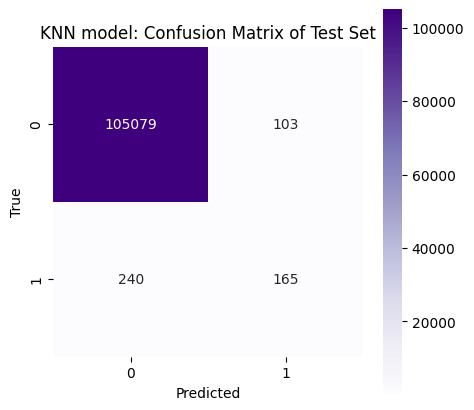

In [36]:
plt.figure(figsize = (5,5))
sns.heatmap(knn_confusion_matrix, annot = True, fmt = 'd', cmap = 'Purples', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("KNN model: Confusion Matrix of Test Set")
plt.show()